In [1]:
%matplotlib inline
import networkx as nx

最大流問題とは？

In [2]:
# 容量付き有向グラフの定義
G = nx.DiGraph()
G.add_nodes_from(['s', 'a', 'b', 'c', 'd', 't'])
G.add_edges_from([('s', 'a', {'capacity': 2}),
                  ('s', 'c', {'capacity': 2}),
                  ('s', 'd', {'capacity': 2}),
                  ('a', 'b', {'capacity': 4}),
                  ('a', 'd', {'capacity': 3}),
                  ('b', 't', {'capacity': 3}),
                  ('c', 'd', {'capacity': 1}),
                  ('d', 'b', {'capacity': 1}),
                  ('d', 't', {'capacity': 3})
                  ])

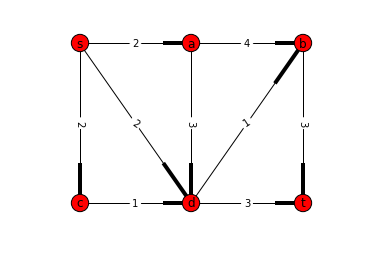

In [3]:
# 容量付き有向グラフの描画
mypos = {'s': (0, 10), \
         'a': (10, 10), \
         'b': (20, 10), \
         'c': (0, 0), \
         'd': (10, 0), \
         't': (20, 0)}
cap = {}
for e in G.edges():
    cap[e] = G.get_edge_data(*e)['capacity']
nx.draw(G, pos = mypos, edge_labels = nx.draw_networkx_edge_labels(G, pos = mypos, edge_labels = cap), with_labels = True)

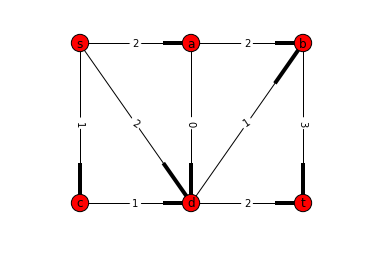

In [4]:
# 流れの描画
f1 = {('s', 'a'): 2,
      ('s', 'c'): 1,
      ('s', 'd'): 2,
      ('a', 'b'): 2,
      ('a', 'd'): 0,
      ('b', 't'): 3,
      ('c', 'd'): 1,
      ('d', 'b'): 1,
      ('d', 't'): 2}
nx.draw(G, pos = mypos, edge_labels = nx.draw_networkx_edge_labels(G, pos = mypos, edge_labels = f1), with_labels = True)

In [5]:
# 流れであることの判定
def is_flow(G, s, t, f):
    for e in G.edges():
        if f[e] < 0:
            print("Flow on edge {0} goes below zero".format(e))
            return False
        if f[e] > G.get_edge_data(*e)['capacity']:
            print("Flow on edge {0} exceeds the capacity".format(e))
            return False
    fout = {}
    fin = {}
    for v in G.nodes():
        fout[v] = 0
        fin[v] = 0
    for e in G.edges():
        fout[e[0]] += f[e]
        fin[e[1]]  += f[e]
    for v in G.nodes():
        if v != s and v != t:
            if fout[v] != fin[v]:
                print("Flow balance is lost at vertex {0}".format(v))
                return False
    return True   

In [6]:
is_flow(G, 's', 't', f1)

True

In [7]:
f2 = {('s', 'a'): 2,
      ('s', 'c'): 1,
      ('s', 'd'): 1,
      ('a', 'b'): 2,
      ('a', 'd'): 0,
      ('b', 't'): 3,
      ('c', 'd'): 1,
      ('d', 'b'): 0,
      ('d', 't'): 2}
is_flow(G, 's', 't', f2)

Flow balance is lost at vertex b


False

In [8]:
f3 = {('s', 'a'): 3,
      ('s', 'c'): 1,
      ('s', 'd'): 2,
      ('a', 'b'): 2,
      ('a', 'd'): 1,
      ('b', 't'): 3,
      ('c', 'd'): 1,
      ('d', 'b'): 1,
      ('d', 't'): 3}
is_flow(G, 's', 't', f3)

Flow on edge ('s', 'a') exceeds the capacity


False

In [9]:
f4 = {('s', 'a'): 1,
      ('s', 'c'): 1,
      ('s', 'd'): 1,
      ('a', 'b'): 2,
      ('a', 'd'): -1,
      ('b', 't'): 3,
      ('c', 'd'): 1,
      ('d', 'b'): 1,
      ('d', 't'): 0}
is_flow(G, 's', 't', f4)

Flow on edge ('a', 'd') goes below zero


False

In [10]:
f5 = {('s', 'a'): 0,
      ('s', 'c'): 0,
      ('s', 'd'): 0,
      ('a', 'b'): 0,
      ('a', 'd'): 0,
      ('b', 't'): 0,
      ('c', 'd'): 0,
      ('d', 'b'): 0,
      ('d', 't'): 0}
is_flow(G, 's', 't', f5)

True

In [11]:
# 総流入と総流出の計算
# f_plusは総流出，f_minusは総流入
def f_plus(G, f):
    fout = {}
    for v in G.nodes():
        fout[v] = 0
    for e in G.edges():
        fout[e[0]] += f[e]
    return fout
def f_minus(G, f):
    fin = {}
    for v in G.nodes():
        fin[v] = 0
    for e in G.edges():
        fin[e[1]] += f[e]
    return fin

In [12]:
print(f_plus( G, f1))
print(f_minus(G, f1))

{'b': 3, 's': 5, 't': 0, 'd': 3, 'c': 1, 'a': 2}
{'b': 3, 's': 0, 't': 5, 'd': 3, 'c': 1, 'a': 2}


In [13]:
# 流量の総和，総流出の総和，総流入の総和が等しいことの確認
print(sum(f1.values()))
print(sum(f_plus(G, f1).values()))
print(sum(f_minus(G, f1).values()))

14
14
14


In [14]:
f_plus(G, f1)['s'] - f_minus(G, f1)['s'] == f_minus(G, f1)['t'] - f_plus(G, f1)['t']

True

流れとカットの弱双対性

In [15]:
cut1 = ['s', 'a', 'c', 'd']

In [16]:
# カット容量の計算
def cut_capacity(G, cut):
    cap = 0
    for e in G.edges():
        if e[0] in cut and not (e[1] in cut):
            cap += G.get_edge_data(*e)['capacity']
    return cap

In [17]:
cut_capacity(G, cut1)

8

In [18]:
cut2 = ['s', 'a', 'b']
cut_capacity(G, cut2)

10

In [19]:
cut3 = ['s', 'a', 'b', 'c', 'd']
cut_capacity(G, cut3)

6

流れとカットの強双対性：最大流最小カット定理

In [20]:
# 補助ネットワークの構成
def residual_network(G, f):
    tmpg = nx.DiGraph()
    tmpg.add_nodes_from(G.nodes())
    for e in G.edges():
        if f[e] < G.get_edge_data(*e)['capacity']:
            tmpg.add_edge(*e, capacity=G.get_edge_data(*e)['capacity']-f[e])
        if f[e] > 0:
            tmpg.add_edge(*(reversed(e)), capacity=f[e])
    return tmpg

In [21]:
Gr = residual_network(G, f5)

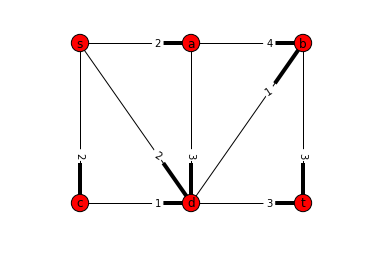

In [22]:
cap = {}
for e in Gr.edges():
    cap[e] = Gr.get_edge_data(*e)['capacity']
nx.draw(Gr, pos = mypos, edge_labels = nx.draw_networkx_edge_labels(Gr, pos = mypos, label_pos = 0.3, edge_labels = cap), with_labels = True)

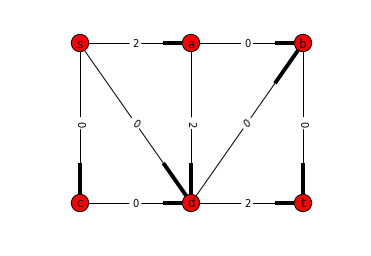

In [23]:
f6 = {('s', 'a'): 2,
      ('s', 'c'): 0,
      ('s', 'd'): 0,
      ('a', 'b'): 0,
      ('a', 'd'): 2,
      ('b', 't'): 0,
      ('c', 'd'): 0,
      ('d', 'b'): 0,
      ('d', 't'): 2}
nx.draw(G, pos = mypos, edge_labels = nx.draw_networkx_edge_labels(G, pos = mypos, edge_labels = f6), with_labels = True)

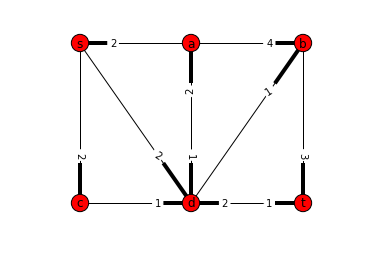

In [24]:
Gr = residual_network(G, f6)
cap = {}
for e in Gr.edges():
    cap[e] = Gr.get_edge_data(*e)['capacity']
nx.draw(Gr, pos = mypos, edge_labels = nx.draw_networkx_edge_labels(Gr, pos = mypos, label_pos = 0.3, edge_labels = cap), with_labels = True)

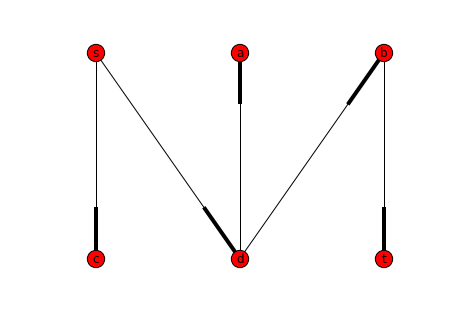

In [25]:
nx.draw(nx.dfs_tree(Gr, 's'), pos = mypos, with_labels = True)

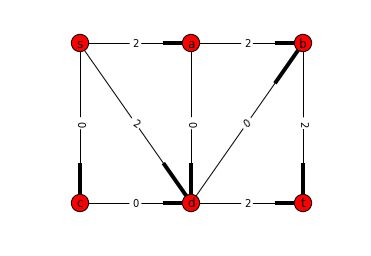

In [26]:
f7 = {('s', 'a'): 2,
      ('s', 'c'): 0,
      ('s', 'd'): 2,
      ('a', 'b'): 2,
      ('a', 'd'): 0,
      ('b', 't'): 2,
      ('c', 'd'): 0,
      ('d', 'b'): 0,
      ('d', 't'): 2}
nx.draw(G, pos = mypos, edge_labels = nx.draw_networkx_edge_labels(G, pos = mypos, edge_labels = f7), with_labels = True)

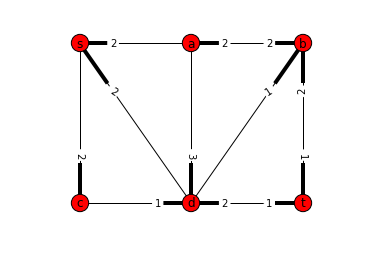

In [27]:
Gr = residual_network(G, f7)
cap = {}
for e in Gr.edges():
    cap[e] = Gr.get_edge_data(*e)['capacity']
nx.draw(Gr, pos = mypos, edge_labels = nx.draw_networkx_edge_labels(Gr, pos = mypos, label_pos = 0.3, edge_labels = cap), with_labels = True)

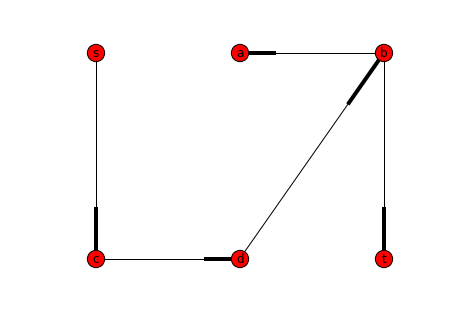

In [28]:
nx.draw(nx.dfs_tree(Gr, 's'), pos = mypos, with_labels = True)

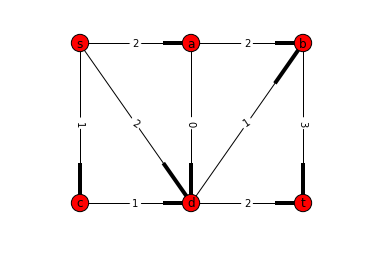

In [29]:
f8 = {('s', 'a'): 2,
      ('s', 'c'): 1,
      ('s', 'd'): 2,
      ('a', 'b'): 2,
      ('a', 'd'): 0,
      ('b', 't'): 3,
      ('c', 'd'): 1,
      ('d', 'b'): 1,
      ('d', 't'): 2}
nx.draw(G, pos = mypos, edge_labels = nx.draw_networkx_edge_labels(G, pos = mypos, edge_labels = f8), with_labels = True)

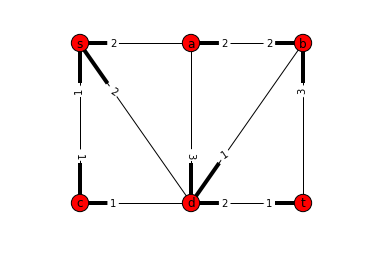

In [30]:
Gr = residual_network(G, f8)
cap = {}
for e in Gr.edges():
    cap[e] = Gr.get_edge_data(*e)['capacity']
nx.draw(Gr, pos = mypos, edge_labels = nx.draw_networkx_edge_labels(Gr, pos = mypos, label_pos = 0.3, edge_labels = cap), with_labels = True)

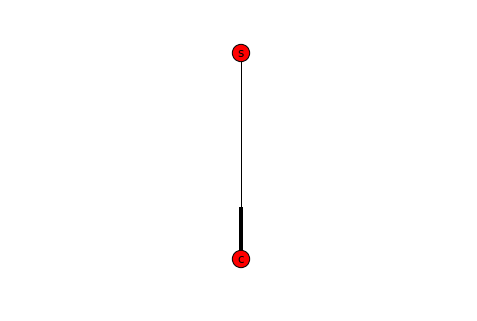

In [31]:
nx.draw(nx.dfs_tree(Gr, 's'), pos = mypos, with_labels = True)

In [32]:
#最大流の計算
nx.maximum_flow(G, 's', 't')

(5,
 {'a': {'b': 2, 'd': 0},
  'b': {'t': 2},
  'c': {'d': 1},
  'd': {'b': 0, 't': 3},
  's': {'a': 2, 'c': 1, 'd': 2},
  't': {}})

In [33]:
#最小カットの計算
nx.minimum_cut(G, 's', 't')

(5, ({'c', 's'}, {'a', 'b', 'd', 't'}))